### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the first dataset

https://www.kaggle.com/shwetabh123/mall-customers

In [2]:
mall_customers_info = pd.read_csv("datasets/mall_customers_data.csv")

mall_customers_info.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_customers_info.shape

(200, 5)

### Checking null value

In [4]:
mall_customers_info.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income             False
Spending Score (1-100)    False
dtype: bool

#### Unique enteries in each of the columns

In [5]:
mall_customers_info.nunique()

CustomerID                200
Gender                      2
Age                        50
Annual_Income              67
Spending Score (1-100)     82
dtype: int64

### Visualizing the data

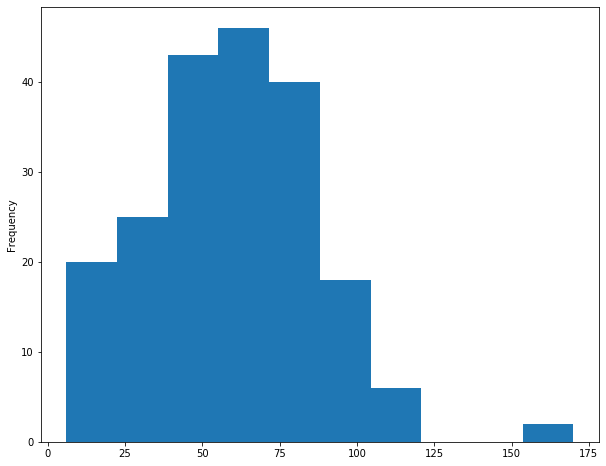

In [6]:
mall_customers_info['Annual_Income'].plot.hist(bins=10, figsize=(10, 8));

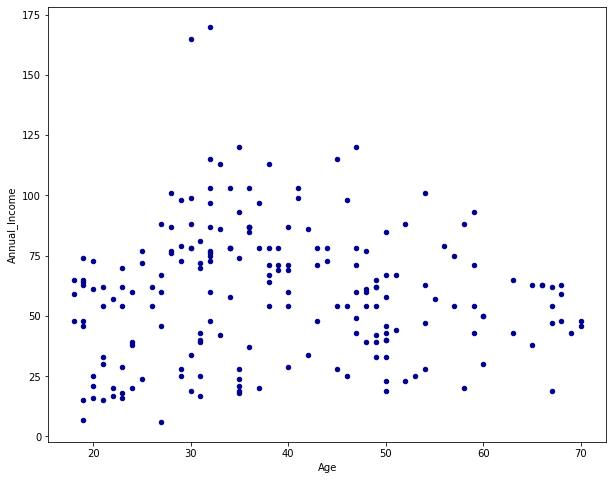

In [7]:
mall_customers_info.plot.scatter(x='Age',
                                y='Annual_Income',
                                c='DarkBlue',
                                figsize=(10, 8));

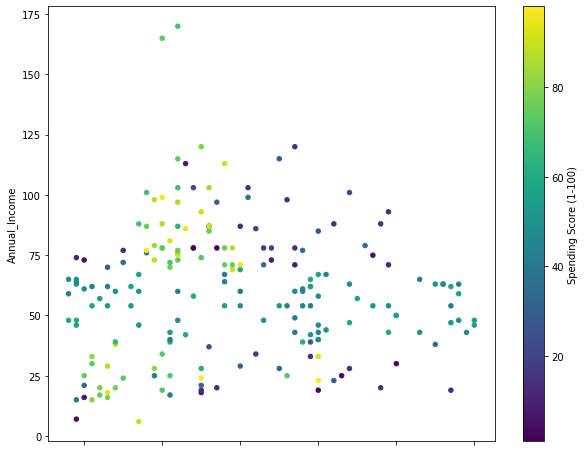

In [8]:
mall_customers_info.plot.scatter(x='Age',
                                 y='Annual_Income',
                                 c='Spending Score (1-100)',
                                 colormap='viridis',
                                 figsize=(10, 8));

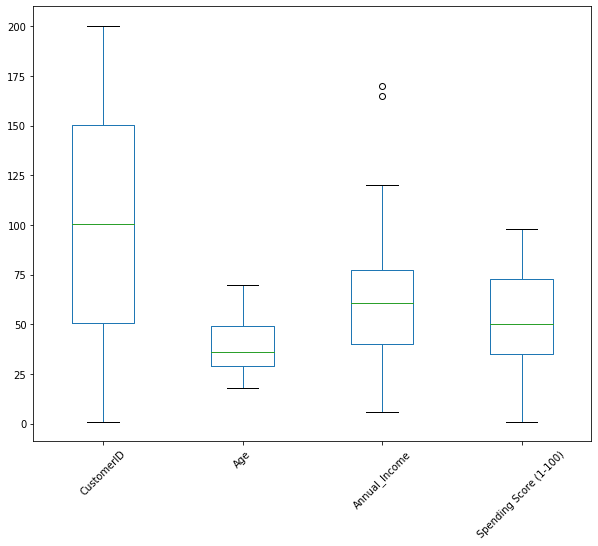

In [9]:
boxplot = mall_customers_info.boxplot(grid=False, rot=45, figsize=(10, 8));

* Annual Income field has outliers

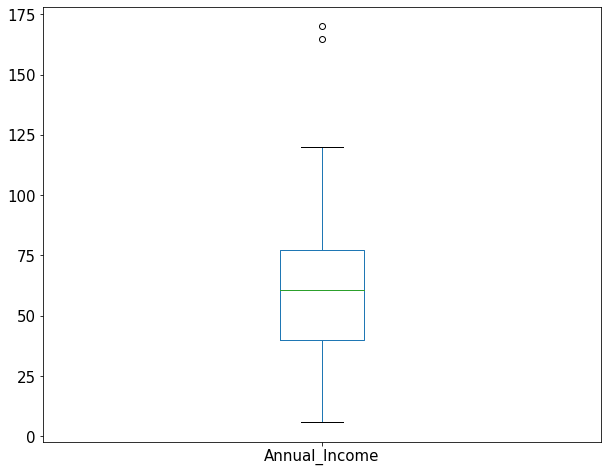

In [10]:
boxplot = mall_customers_info.boxplot(grid=False, fontsize=15, 
                                      column=['Annual_Income'], figsize=(10, 8));

In [11]:
mall_customers_info.loc[mall_customers_info['Annual_Income'] > 125]                                         

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


### IQR (Interquartile range) method
Boxplots use the IQR method to display data and outliers(shape of the data) but in order to get a list of identified outlier and to retrieve the outlier data mathematical formula should be used.

The `interquartile range` (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1

In [12]:
Q1 = mall_customers_info['Annual_Income'].quantile(0.25)
Q3 = mall_customers_info['Annual_Income'].quantile(0.75)

print(Q1, Q3)

40.0 77.25


In [13]:
IQR = Q3 - Q1

#### As the Minimum value of `Annual_Income` is less than the minimum value, mentioning one condition is enough

In [14]:
mall_customers_info['Annual_Income_Outlier'] = False

In [15]:
Q1 + 1.5 * IQR

95.875

In [16]:
for index, row in mall_customers_info.iterrows():
    
    if row['Annual_Income']  > (Q1 + 1.5 * IQR):
        mall_customers_info.at[index, 'Annual_Income_Outlier'] = True

In [17]:
mall_customers_info['Annual_Income_Outlier'].sum()

20

#### Including outliers in the mean calculation, another way would be to not include outliers

In [18]:
non_outliers = mall_customers_info.loc[mall_customers_info['Annual_Income_Outlier'] == False]

non_outliers.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [19]:
mean = non_outliers['Annual_Income'].mean()
mean

54.05555555555556

In [20]:
for index, row in mall_customers_info.iterrows():
    
    if row['Annual_Income_Outlier']  == True:
        mall_customers_info.at[index, 'Annual_Income'] = mean

In [21]:
mall_customers_info.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Annual_Income_Outlier
41,42,Male,24,38,92,False
105,106,Female,21,62,42,False
48,49,Female,29,25,42,False
155,156,Female,27,6,89,False
158,159,Male,34,78,1,False


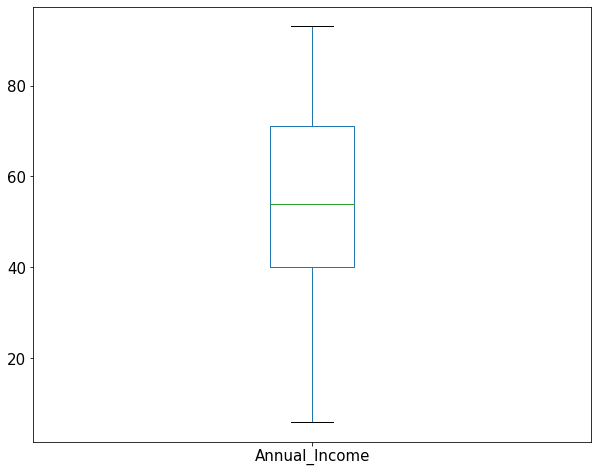

In [22]:
boxplot = mall_customers_info.boxplot(grid=False, fontsize=15, 
                                      column=['Annual_Income'], figsize=(10, 8));